# Model

Found 6580 images belonging to 18 classes.
Found 1637 images belonging to 18 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                             

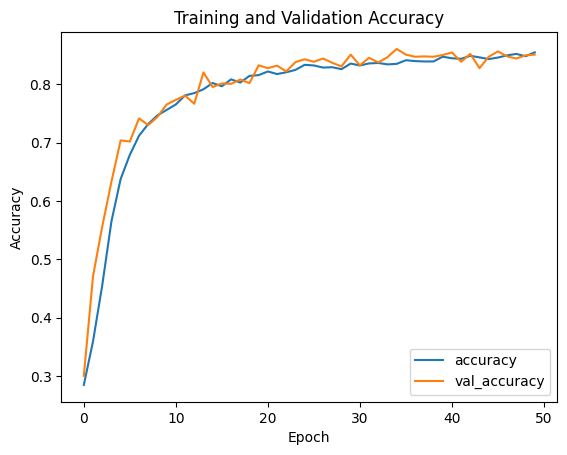

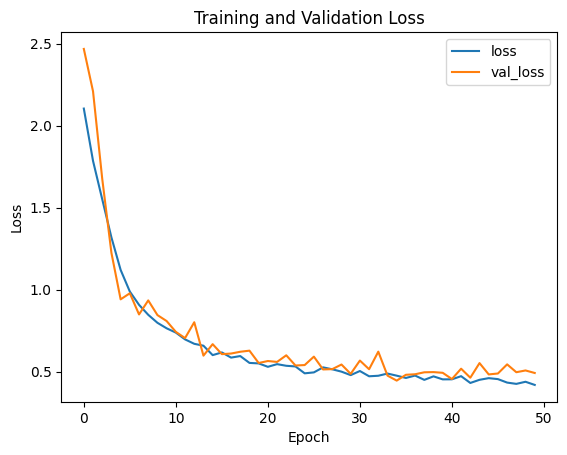

In [ ]:
import os
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


class MRIBrainClassifier:
    def __init__(self, input_size, c):
        self.input_size = input_size
        self.c = c
        self.path_model = "./model"
        self.model = self._build_model(input_size, c)
        self.train_generator = None
        self.validation_generator = None

    def _build_model(self, input_size, c):
        model = Sequential([
            InputLayer(input_shape=input_size + (c,)),
            Conv2D(64, (3, 3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(3, 3)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(18, activation='softmax'),
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.CategoricalAccuracy()],
        )

        return model

    def image_data_generator(self, dataset):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
        )

        self.train_generator = datagen.flow_from_directory(
            os.path.join(dataset, "training"),
            target_size=self.input_size,
            batch_size=32,
            class_mode="categorical",
            color_mode="grayscale",  # เปลี่ยนเป็น 'grayscale'
        )

        self.validation_generator = datagen.flow_from_directory(
            os.path.join(dataset, "validation"),
            target_size=self.input_size,
            batch_size=32,
            class_mode="categorical",
            color_mode="grayscale",  # เปลี่ยนเป็น 'grayscale'
        )

    def train(self, epochs):
        if not os.path.exists(self.path_model):
            os.makedirs(self.path_model)

        # current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        # filepath = f"{self.path_model}/{current_time}.h5"
        history = self.model.fit(
            self.train_generator,
            validation_data=self.validation_generator,
            steps_per_epoch=len(self.train_generator),
            epochs=epochs,
            # callbacks=[
            #     ModelCheckpoint(
            #         filepath=filepath,
            #         monitor="accuracy",
            #         save_best_only=True,
            #     ),
            # ],
        )

        self.model.save(f"{self.path_model}/brain_model.h5")

        return history

    def summary(self):
        self.model.summary()

    def show_images(self):
        for images, labels in self.train_generator:
            for i in range(len(images)):
                plt.imshow(images[i].reshape(self.input_size), cmap='gray')
                plt.title(f'Label: {labels[i]}')
                plt.show()
            break


def plot_accuracy(history):
    plt.plot(history.history['categorical_accuracy'], label='accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()


def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()


model = MRIBrainClassifier((50, 50), 1)
model.image_data_generator("./database")
model.summary()
history = model.train(50)

plot_accuracy(history)
plot_loss(history)

# Tools


In [1]:
import os
import shutil
import random

source_folder = "./database/training"
source_traget = "./database/validation"

for folder in os.listdir(source_folder):
    if not os.path.isdir(os.path.join(source_traget, folder)):
        os.makedirs(os.path.join(source_traget, folder))

    file_list = os.listdir(os.path.join(source_folder, folder))
    files_to_move = int(len(file_list) * 0.2)

    samples_to_move = random.sample(file_list,files_to_move)
    
    for sample in samples_to_move:
        shutil.move(os.path.join(source_folder, folder, sample), os.path.join(source_traget, folder, sample))
        print(sample)


097-12-25-1982-na-intraop-32800-5.000000-3daxt1postcontrast-27134-1-058.jpg
048-12-25-1982-na-intraop-38897-4.000000-2daxt2blade-12052-1-29.jpg
111-12-25-1982-na-intraop-53926-7.000000-3daxt1precontrast-82718-1-118.jpg
080-12-25-1982-na-intraop-79469-4.000000-2daxt2blade-36452-1-33.jpg
080-12-25-1982-na-preop-20787-2.000000-2daxt2flair-57047-1-18.jpg
108-12-25-1982-na-preop-69615-2.000000-3daxt1postcontrast-83188-1-085.jpg
002-12-25-1982-na-preop-78948-1.000000-3daxt1postcontrast-17667-1-042.jpg
034-12-25-1982-na-intraop-96469-4.000000-axt2blade-28024-1-39.jpg
002-12-25-1982-na-preop-78948-2.000000-3daxt2space-39478-1-041.jpg
079-12-25-1982-na-preop-39114-3.000000-3daxt1postcontrast-48871-1-063.jpg
096-12-25-1982-na-intraop-94095-4.000000-2daxt2blade-45735-1-34.jpg
059-12-25-1982-na-preop-29179-2.000000-3daxt2space-28551-1-129.jpg
034-12-25-1982-na-intraop-96469-4.000000-axt2blade-28024-1-36.jpg
060-12-25-1982-na-preop-02294-3.000000-3daxt1postcontrast-59019-1-045.jpg
077-12-25-1982-na

# convert grayscale to binary

In [ ]:
import cv2
import os

dataset_dir = "./database/original/training"
dataset_dir_output = "./database/binary/training"

for root, dirs, files in os.walk(dataset_dir):
    for dir in dirs:
        if not os.path.exists(os.path.join(dataset_dir_output, dir)):
            os.makedirs(os.path.join(dataset_dir_output, dir))

        for file in os.listdir(os.path.join(dataset_dir, dir)):
            img = cv2.imread(os.path.join(dataset_dir, dir, file))
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            threshold = 45
            img_binary = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)[1]
            cv2.imwrite(os.path.join(dataset_dir_output, dir, file), img_binary)
            print(file)
